# Вступление и описание работы

## Импорт необходимых библиотек и объявление констант

In [1]:
pip install phik -q

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install Catboost -q

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error
import ta
import os
import phik

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import Pipeline

from sklearn.model_selection import (train_test_split,
                                     RandomizedSearchCV,
                                     GridSearchCV)


from sklearn.preprocessing import (StandardScaler,
                                   RobustScaler,
                                   MinMaxScaler,
                                   OrdinalEncoder,
                                   OneHotEncoder)


from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

from sklearn.metrics import (make_scorer,
                             mean_absolute_error,
                             roc_auc_score,
                             f1_score,
                             precision_score,
                             accuracy_score,
                             recall_score, 
                             classification_report, 
                             confusion_matrix,
                             precision_recall_curve, 
                             average_precision_score,
                             mean_squared_error)


from sklearn.inspection import permutation_importance
from xgboost import XGBClassifier

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

import scipy.stats as stats


from catboost import CatBoostClassifier
from sklearn.dummy import DummyClassifier

import os
import phik


TEST_SIZE = 0.25
RANDOM_STATE = 666


In [5]:
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format','{:.4f}'.format)

# Загрузка данных и ознакомление с ними

In [6]:
df_train = pd.read_csv('heart_train.csv')
df_test = pd.read_csv('heart_test.csv')

In [7]:
df_train.shape

(8685, 28)

In [8]:
df_train.head()

,Unnamed: 0,Age,Cholesterol,Heart rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Diet,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk (Binary),Blood sugar,CK-MB,Troponin,Gender,Systolic blood pressure,Diastolic blood pressure,id
0,0,0.3596,0.7321,0.0742,1.0000,1.0000,1.0000,1.0000,1.0000,0.5355,1,1.0000,0.0000,8.0000,0.2257,0.1059,0.4592,0.9792,3.0000,0.3333,0.0000,0.2270,0.0482,0.0365,Male,0.2129,0.7093,2664
1,1,0.2022,0.3250,0.0477,1.0000,1.0000,0.0000,0.0000,1.0000,0.0687,2,1.0000,0.0000,9.0000,0.2899,0.1642,0.1171,0.5156,3.0000,0.8333,0.0000,0.1502,0.0176,0.0002,Female,0.4129,0.5698,9287
2,2,0.6067,0.8607,0.0559,1.0000,0.0000,1.0000,1.0000,1.0000,0.9440,2,1.0000,1.0000,6.0000,0.5501,0.5987,0.3736,0.0130,2.0000,1.0000,0.0000,0.2270,0.0482,0.0365,Female,0.2387,0.2209,5379
3,3,0.7303,0.0071,0.0532,0.0000,0.0000,1.0000,0.0000,1.0000,0.6970,0,0.0000,1.0000,3.0000,0.3310,0.0776,0.0497,0.1312,0.0000,0.3333,1.0000,0.2270,0.0482,0.0365,Female,0.3484,0.2674,8222
4,4,0.7753,0.7571,0.0220,0.0000,0.0000,1.0000,0.0000,1.0000,0.4129,1,0.0000,0.0000,8.0000,0.5246,0.3420,0.8304,0.0701,5.0000,1.0000,1.0000,0.2270,0.0482,0.0365,Male,0.6194,0.4419,4047


In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8685 entries, 0 to 8684
Data columns (total 28 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Unnamed: 0                       8685 non-null   int64  
 1   Age                              8685 non-null   float64
 2   Cholesterol                      8685 non-null   float64
 3   Heart rate                       8685 non-null   float64
 4   Diabetes                         8442 non-null   float64
 5   Family History                   8442 non-null   float64
 6   Smoking                          8442 non-null   float64
 7   Obesity                          8442 non-null   float64
 8   Alcohol Consumption              8442 non-null   float64
 9   Exercise Hours Per Week          8685 non-null   float64
 10  Diet                             8685 non-null   int64  
 11  Previous Heart Problems          8442 non-null   float64
 12  Medication Use      

In [10]:
df_train.describe()

,Unnamed: 0,Age,Cholesterol,Heart rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Diet,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk (Binary),Blood sugar,CK-MB,Troponin,Systolic blood pressure,Diastolic blood pressure,id
count,8685.0000,8685.0000,8685.0000,8685.0000,8442.0000,8442.0000,8442.0000,8442.0000,8442.0000,8685.0000,8685.0000,8442.0000,8442.0000,8442.0000,8685.0000,8685.0000,8685.0000,8685.0000,8442.0000,8685.0000,8685.0000,8685.0000,8685.0000,8685.0000,8685.0000,8685.0000,8685.0000
mean,4342.0000,0.4500,0.5011,0.0507,0.6521,0.4896,0.9029,0.4983,0.6020,0.5034,1.0575,0.4954,0.5012,5.4934,0.4992,0.4961,0.4968,0.5055,3.5083,0.5037,0.3469,0.2273,0.0482,0.0367,0.4503,0.4976,4831.2108
std,2507.2879,0.2312,0.2847,0.0235,0.4763,0.4999,0.2962,0.5000,0.4895,0.2848,0.8666,0.5000,0.5000,2.8679,0.2853,0.2847,0.2826,0.2863,2.2818,0.3281,0.4760,0.0766,0.0755,0.0602,0.1702,0.1718,2782.5856
min,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000
25%,2171.0000,0.2584,0.2679,0.0348,0.0000,0.0000,1.0000,0.0000,0.0000,0.2633,0.0000,0.0000,0.0000,3.0000,0.2559,0.2519,0.2542,0.2636,2.0000,0.1667,0.0000,0.2270,0.0482,0.0365,0.3032,0.3488,2425.0000
50%,4342.0000,0.4607,0.4998,0.0504,1.0000,0.0000,1.0000,0.0000,1.0000,0.5021,1.0000,0.0000,1.0000,5.0000,0.4999,0.4949,0.4948,0.5036,3.0000,0.5000,0.0000,0.2270,0.0482,0.0365,0.4452,0.5000,4837.0000
75%,6513.0000,0.6404,0.7464,0.0660,1.0000,1.0000,1.0000,1.0000,1.0000,0.7487,2.0000,1.0000,1.0000,8.0000,0.7446,0.7410,0.7370,0.7506,6.0000,0.8333,1.0000,0.2270,0.0482,0.0365,0.6000,0.6512,7242.0000
max,8684.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,3.0000,1.0000,1.0000,10.0000,1.0000,1.0000,1.0000,1.0000,7.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,9650.0000


In [11]:
df_test.shape

(966, 27)

In [12]:
df_test.head()

,Unnamed: 0,Age,Cholesterol,Heart rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Diet,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Blood sugar,CK-MB,Troponin,Gender,Systolic blood pressure,Diastolic blood pressure,id
0,0,0.4944,0.2643,0.0623,0.0000,1.0000,1.0000,1.0000,1.0000,0.3616,2,0.0000,0.0000,8.0000,0.1944,0.5878,0.2835,0.3065,1.0000,0.3333,0.2270,0.0482,0.0365,Male,0.2839,0.3721,7746
1,1,0.2247,0.9536,0.0825,1.0000,0.0000,0.0000,1.0000,0.0000,0.9965,2,1.0000,1.0000,5.0000,0.3299,0.6029,0.4670,0.0870,0.0000,0.1667,0.2270,0.0482,0.0365,Female,0.7032,0.4419,4202
2,2,0.6292,0.0929,0.0642,0.0000,1.0000,1.0000,1.0000,0.0000,0.9956,0,0.0000,0.0000,10.0000,0.7801,0.3704,0.4094,0.2052,7.0000,1.0000,0.1028,0.0027,0.0885,Male,0.4581,0.7791,6632
3,3,0.4607,0.5679,0.0559,1.0000,1.0000,1.0000,1.0000,1.0000,0.4373,0,0.0000,0.0000,10.0000,0.7851,0.3682,0.9103,0.1636,0.0000,0.6667,0.2036,0.0564,0.2718,Female,0.7419,0.2558,4639
4,4,0.7191,0.4857,0.0229,1.0000,0.0000,1.0000,0.0000,1.0000,0.5149,0,0.0000,0.0000,7.0000,0.0709,0.7296,0.7589,0.5805,5.0000,0.0000,0.2270,0.0482,0.0365,Male,0.4129,0.3953,4825


In [13]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 966 entries, 0 to 965
Data columns (total 27 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Unnamed: 0                       966 non-null    int64  
 1   Age                              966 non-null    float64
 2   Cholesterol                      966 non-null    float64
 3   Heart rate                       966 non-null    float64
 4   Diabetes                         935 non-null    float64
 5   Family History                   935 non-null    float64
 6   Smoking                          935 non-null    float64
 7   Obesity                          935 non-null    float64
 8   Alcohol Consumption              935 non-null    float64
 9   Exercise Hours Per Week          966 non-null    float64
 10  Diet                             966 non-null    int64  
 11  Previous Heart Problems          935 non-null    float64
 12  Medication Use        

## Промежуточный вывод после ознакомления с данными:
* Тренировочный набор данных имеет:
    * 8685 записей
    * 27 столбцов + целевой признак
    * Присутствуют пропуски

* Тестовый набор данных имеет:
    * 966 записей
    * 27 столбцов
    * Присутствуют пропуски

1) Часть данных нормализованы, это необходимо учесть в будущем.
2) Признак "Previous Heart Problems", может являться утечкой целевого признака.
3) Признак "Income" не является содержательным в контексте данного исследования

# Предобработка данных 

Ознакомимся с пропусками в данных

In [14]:
df_train.isna().sum()

Unnamed: 0                           0
Age                                  0
Cholesterol                          0
Heart rate                           0
Diabetes                           243
Family History                     243
Smoking                            243
Obesity                            243
Alcohol Consumption                243
Exercise Hours Per Week              0
Diet                                 0
Previous Heart Problems            243
Medication Use                     243
Stress Level                       243
Sedentary Hours Per Day              0
Income                               0
BMI                                  0
Triglycerides                        0
Physical Activity Days Per Week    243
Sleep Hours Per Day                  0
Heart Attack Risk (Binary)           0
Blood sugar                          0
CK-MB                                0
Troponin                             0
Gender                               0
Systolic blood pressure  

In [15]:
missing_rows_train = df_train[df_train.isnull().any(axis=1)]
missing_rows_train


,Unnamed: 0,Age,Cholesterol,Heart rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Diet,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk (Binary),Blood sugar,CK-MB,Troponin,Gender,Systolic blood pressure,Diastolic blood pressure,id
16,16,0.4494,0.4998,0.0632,NaN,NaN,NaN,NaN,NaN,0.5021,3,NaN,NaN,NaN,0.4999,0.4949,0.4948,0.5036,NaN,0.5046,0.0000,0.2332,0.0267,0.0008,1.0,0.3935,0.2558,9528
90,90,0.3708,0.4998,0.0669,NaN,NaN,NaN,NaN,NaN,0.5021,3,NaN,NaN,NaN,0.4999,0.4949,0.4948,0.5036,NaN,0.5046,0.0000,0.1542,0.0047,0.0420,1.0,0.2581,0.3372,9640
92,92,0.6292,0.4998,0.0733,NaN,NaN,NaN,NaN,NaN,0.5021,3,NaN,NaN,NaN,0.4999,0.4949,0.4948,0.5036,NaN,0.5046,0.0000,0.2569,0.0123,0.0008,0.0,0.2581,0.2326,9515
185,185,0.5169,0.4998,0.0458,NaN,NaN,NaN,NaN,NaN,0.5021,3,NaN,NaN,NaN,0.4999,0.4949,0.4948,0.5036,NaN,0.5046,0.0000,0.5593,0.0067,0.0003,0.0,0.1742,0.1512,9491
188,188,0.2697,0.4998,0.0357,NaN,NaN,NaN,NaN,NaN,0.5021,3,NaN,NaN,NaN,0.4999,0.4949,0.4948,0.5036,NaN,0.5046,0.0000,0.1126,0.0512,0.0005,0.0,0.2258,0.1628,9448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8461,8461,0.7191,0.4998,0.0495,NaN,NaN,NaN,NaN,NaN,0.5021,3,NaN,NaN,NaN,0.4999,0.4949,0.4948,0.5036,NaN,0.5046,0.0000,0.1383,0.0040,0.0032,1.0,0.5484,0.5581,9455
8509,8509,0.6517,0.4998,0.0367,NaN,NaN,NaN,NaN,NaN,0.5021,3,NaN,NaN,NaN,0.4999,0.4949,0.4948,0.5036,NaN,0.5046,0.0000,0.2391,0.0558,0.0608,1.0,0.7290,0.7791,9506
8536,8536,0.6517,0.4998,0.0541,NaN,NaN,NaN,NaN,NaN,0.5021,3,NaN,NaN,NaN,0.4999,0.4949,0.4948,0.5036,NaN,0.5046,0.0000,0.2767,0.0087,0.1504,1.0,0.6065,0.7907,9474
8619,8619,0.6067,0.4998,0.0596,NaN,NaN,NaN,NaN,NaN,0.5021,3,NaN,NaN,NaN,0.4999,0.4949,0.4948,0.5036,NaN,0.5046,0.0000,0.1561,0.0577,0.0006,0.0,0.3871,0.5000,9467


In [16]:
len(missing_rows_train['id'].unique())

243

Для 243 пациентов из тренировочной выборки не указана часть данных

In [17]:
print(f'Пропущенные значения составляют {round(len(missing_rows_train) / len(df_train) * 100, 2)}% от тренировочного  датасета')

Пропущенные значения составляют 2.8% от тренировочного  датасета


In [18]:
missing_rows_test = df_test[df_test.isnull().any(axis=1)]

In [19]:
len(missing_rows_test['id'].unique())

31

In [20]:
print(f'Пропущенные значения составляют {round(len(missing_rows_test) / len(df_test) * 100, 2)}% от тестового датасета')

Пропущенные значения составляют 3.21% от тестового датасета


In [21]:
missing_columns_test = df_test.columns[df_test.isnull().any()]
missing_columns_train = df_train.columns[df_train.isnull().any()]

In [22]:
missing_columns_test.isin(missing_columns_test).all()

np.True_

в обоих датасетах пропуски в одних и тех же столбцах

***Количество пропусков составляет ~3% от общего объема данных, считаю, что их можно удалить. Так как восстановить медицинские данные пациентов проблематично.***

In [23]:
df_train = df_train.dropna()
df_test = df_test.dropna()
df_train = df_train.drop(columns=['Unnamed: 0', 'Income', 'Previous Heart Problems'])
df_test = df_test.drop(columns=['Unnamed: 0', 'Income'])

In [24]:
df_train['Gender'] = df_train['Gender'].map({
    'Male': 1,
    '1.0': 1,
    'Female': 0,
    '0.0': 0
})

**Чтобы продолжить исследование и не изменять исходный датасет, сделаем копию.**

In [81]:
train_copy = df_train.copy()

In [26]:
train_copy['Gender'] = train_copy['Gender'].map({
    'Male': 1,
    '1.0': 1,
    'Female': 0,
    '0.0': 0
})


In [27]:
print(train_copy['Gender'].unique())


[nan]


In [105]:

INTERVAL_COLS = train_copy.select_dtypes(include='number')
INTERVAL_COLS
phik = train_copy.drop('id',axis=1).phik_matrix(interval_cols=INTERVAL_COLS)

<Axes: >

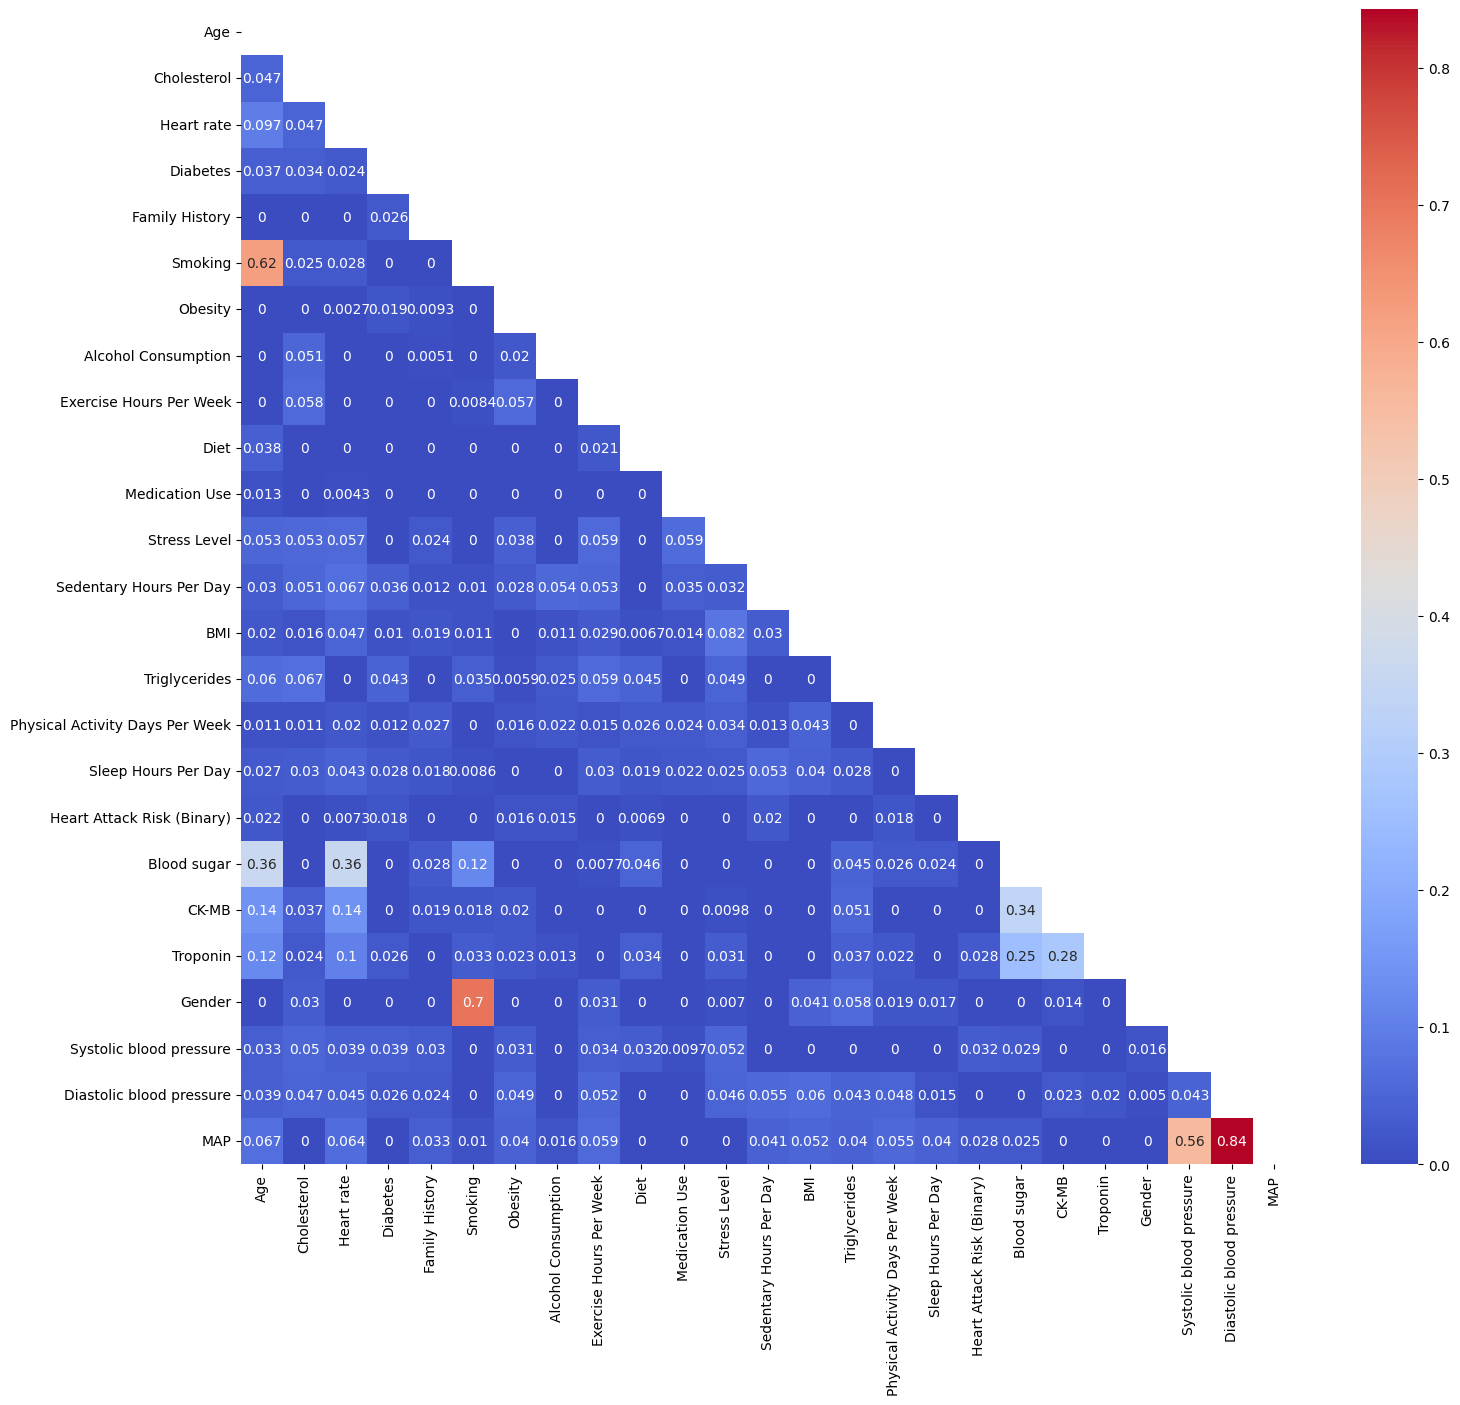

In [106]:
plt.figure(figsize=(17,15))
mask = np.triu(np.ones_like(phik, dtype=bool))
sns.heatmap(phik, annot=True, mask=mask, cmap='coolwarm')

In [30]:
phik_pairs = (
    phik
    .where(~mask)  
    .stack()  
    .reset_index()
)

phik_pairs.columns = ['Признак 1', 'Признак 2', '$\\phi$ Корреляция']

phik_pairs_sorted = phik_pairs.sort_values(by='$\\phi$ Корреляция', ascending=False)

phik_pairs_sorted.head(10)

,Признак 1,Признак 2,$\phi$ Корреляция
10,Smoking,Age,0.6205
153,Blood sugar,Age,0.3595
155,Blood sugar,Heart rate,0.3582
189,CK-MB,Blood sugar,0.3372
209,Troponin,CK-MB,0.2844
208,Troponin,Blood sugar,0.2506
173,CK-MB,Heart rate,0.1417
171,CK-MB,Age,0.1386
190,Troponin,Age,0.1230
158,Blood sugar,Smoking,0.1156


In [114]:
model_dummy = DummyClassifier()
X = train_copy.drop(columns=['Heart Attack Risk (Binary)', 'id'])
y = train_copy['Heart Attack Risk (Binary)']

In [115]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=TEST_SIZE, random_state=RANDOM_STATE)

In [116]:
X_train.head()

,Age,Cholesterol,Heart rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Diet,Medication Use,Stress Level,Sedentary Hours Per Day,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Blood sugar,CK-MB,Troponin,Gender,Systolic blood pressure,Diastolic blood pressure,MAP
3120,0.1573,0.6143,0.0357,1.0000,1.0000,1.0000,0.0000,0.0000,0.7547,0,0.0000,5.0000,0.3088,0.2895,0.6571,2.0000,0.6667,0.2270,0.0482,0.0365,1,0.2258,0.7907,0.6024
2925,0.2697,0.4893,0.0330,0.0000,0.0000,0.0000,1.0000,1.0000,0.4140,1,0.0000,9.0000,0.6120,0.6805,0.5896,0.0000,0.8333,0.2270,0.0482,0.0365,0,0.2065,0.4419,0.3634
4251,0.4831,0.6143,0.0733,1.0000,1.0000,1.0000,0.0000,0.0000,0.8478,0,1.0000,8.0000,0.4788,0.6606,0.7740,3.0000,1.0000,0.2270,0.0482,0.0365,1,0.5806,0.7558,0.6974
4090,0.1348,0.8893,0.0467,0.0000,0.0000,1.0000,1.0000,0.0000,0.7744,0,0.0000,8.0000,0.0353,0.4890,0.6377,1.0000,0.6667,0.2270,0.0482,0.0365,1,0.3161,0.3605,0.3457
1350,0.2360,0.1857,0.0632,0.0000,0.0000,1.0000,1.0000,1.0000,0.4815,0,0.0000,5.0000,0.0551,0.7744,0.6351,7.0000,1.0000,0.2270,0.0482,0.0365,1,0.1871,0.3721,0.3104


df_train['MAP'] = (1/3)*df_train['Systolic blood pressure'] + (2/3)*df_train['Diastolic blood pressure']


df_train['MAP']

Диета категориальный или порядковый, стресс тоже порядковый, диабет бинарный,Family History бинарный, Smoking бинарный, Obesity бинарный, Alcohol Consumption бинарный, Medication Use бинарный, Physical Activity Days Per Week порядковый, Gender бинарный,

In [117]:
ordinal_features = ['Diet', 'Stress Level', 'Physical Activity Days Per Week']
numerical_features = ['Age', 'Cholesterol', 'Heart rate', 'BMI', 'Triglycerides',
                      'Sleep Hours Per Day', 'Systolic blood pressure', 'Diastolic blood pressure', 'MAP']
binary_features = ['Diabetes', 'Family History', 'Smoking', 'Obesity',
                   'Alcohol Consumption', 'Medication Use', 'Gender']

# Препроцессинг
data_preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical_features),
    ('ord', Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent', missing_values=np.nan)),
        ('encoder', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
    ]), ordinal_features),
    ('bin', 'passthrough', binary_features)
])

# Финальный пайплайн
pipe = Pipeline([
    ('preprocessor', data_preprocessor),
    ('model', CatBoostClassifier(verbose=0, random_state=RANDOM_STATE))
])

In [118]:
df_train['Heart Attack Risk (Binary)'].value_counts()

Heart Attack Risk (Binary)
0.0000    5429
1.0000    3013
Name: count, dtype: int64

In [119]:
scoring = make_scorer(recall_score)

# Параметры для перебора 
param_grid = [
    {
        'model': [CatBoostClassifier(verbose=0, task_type='GPU', class_weights=[1.0, 1.8])],  
        'model__iterations': [50],
        'model__learning_rate': [0.01, 0.1],
        'model__depth': [4, 6],
        'model__l2_leaf_reg': [1, 3],
        'model__border_count': [32, 64], 
    }
]


r_search = RandomizedSearchCV(
pipe,
param_distributions=param_grid,
n_iter=10,
scoring=scoring,
refit=True,
verbose=3,
cv=5,
random_state=RANDOM_STATE,
n_jobs=1)

In [120]:
%%time
# Обучение
r_search.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END model=<catboost.core.CatBoostClassifier object at 0x0000023515BABEC0>, model__border_count=64, model__depth=4, model__iterations=50, model__l2_leaf_reg=3, model__learning_rate=0.1;, score=0.507 total time=   0.9s
[CV 2/5] END model=<catboost.core.CatBoostClassifier object at 0x0000023515BABEC0>, model__border_count=64, model__depth=4, model__iterations=50, model__l2_leaf_reg=3, model__learning_rate=0.1;, score=0.532 total time=   0.7s
[CV 3/5] END model=<catboost.core.CatBoostClassifier object at 0x0000023515BABEC0>, model__border_count=64, model__depth=4, model__iterations=50, model__l2_leaf_reg=3, model__learning_rate=0.1;, score=0.542 total time=   0.7s
[CV 4/5] END model=<catboost.core.CatBoostClassifier object at 0x0000023515BABEC0>, model__border_count=64, model__depth=4, model__iterations=50, model__l2_leaf_reg=3, model__learning_rate=0.1;, score=0.532 total time=   0.7s
[CV 5/5] END model=<catboost.core.C

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('num',
                                                                               StandardScaler(),
                                                                               ['Age',
                                                                                'Cholesterol',
                                                                                'Heart '
                                                                                'rate',
                                                                                'BMI',
                                                                                'Triglycerides',
                                                                                'Sleep '
                                                                                'Hours '
                                                                                'Per '
                                                                                'Day',
                                                                                'Systolic '
                                                                                'blood '
                                                                                'pressure',
                                                                                'Diastolic '
                                                                                'blood '
                                                                                'pressure',
                                                                                'MAP']),
                                                                              ('ord',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='most_frequent')),
                                                                                               ('enco...
                                              <catboost.core.CatBoostClassifier object at 0x00000234C1C223F0>)]),
                   n_jobs=1,
                   param_distributions=[{'model': [<catboost.core.CatBoostClassifier object at 0x0000023515BABEC0>],
                                         'model__border_count': [32, 64],
                                         'model__depth': [4, 6],
                                         'model__iterations': [50],
                                         'model__l2_leaf_reg': [1, 3],
                                         'model__learning_rate': [0.01, 0.1]}],
                   random_state=666,
                   scoring=make_scorer(recall_score, response_method='predict'),
                   verbose=3)

In [121]:
y_proba = r_search.predict_proba(X_test)[:,1]
y_pred = r_search.predict(X_test)

In [122]:
print("Лучшая модель:\n", r_search.best_estimator_.named_steps['model'])
print("Лучший результат:", round(r_search.best_score_, 4))
print('roc_auc', roc_auc_score(y_test,y_proba))
print('recall', recall_score(y_test,y_pred))


Лучшая модель:
Лучший результат: 0.6421
roc_auc 0.5110129953344947
recall 0.6885474860335196


первый прогресс
Лучшая модель:
 <catboost.core.CatBoostClassifier object at 0x0000023511C4C110>
 
Лучший результат: 0.6421

roc_auc 0.5110129953344947

recall 0.6885474860335196

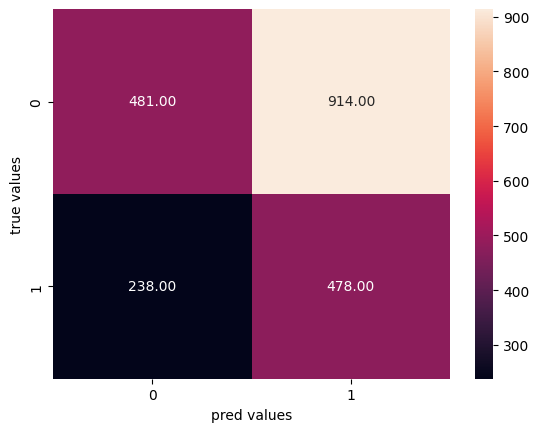

In [107]:
cm =confusion_matrix(y_test,  y_pred)
sns.heatmap(cm, annot=True, fmt='.2f')
plt.ylabel('true values')
plt.xlabel('pred values');

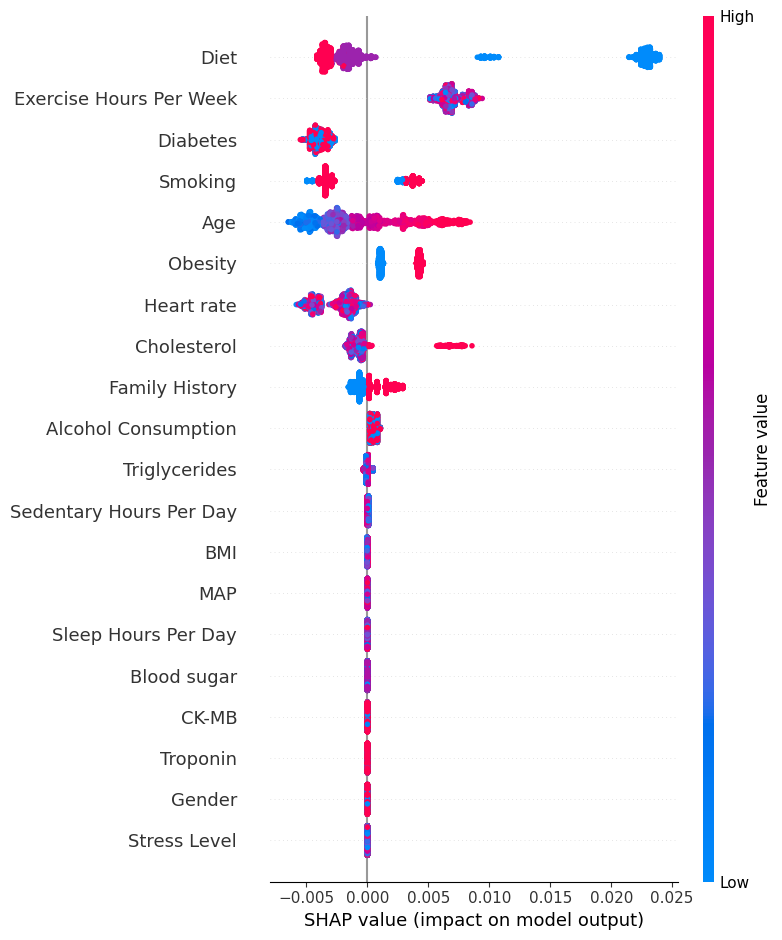

In [108]:
import shap
catboost_model = r_search.best_estimator_.named_steps['model']
explainer = shap.TreeExplainer(catboost_model)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)


In [110]:
df_test['Gender'] = df_test['Gender'].map({
    'Male': 1,
    '1.0': 1,
    'Female': 0,
    '0.0': 0
})

In [111]:
test = r_search.best_estimator_.predict(df_test)


ValueError: columns are missing: {'MAP'}

In [112]:
y_proba_2 = r_search.best_estimator_.predict_proba(df_test)[:, 1]


ValueError: columns are missing: {'MAP'}

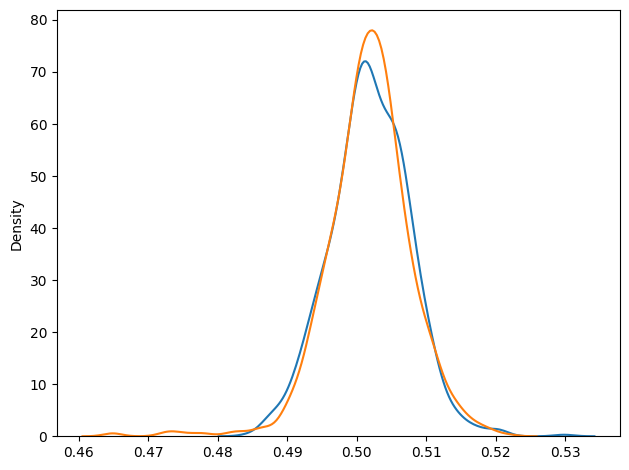

In [113]:
sns.kdeplot(y_proba_2)
sns.kdeplot(y_proba)
plt.tight_layout()